## Daniel Barella
## 10/8/25

### Day 33 – Regularization (L1/L2/Ridge/Lasso)
**Focus:** Preventing overfitting by penalizing model complexity.

**Mini Project:**  
- Dataset: California Housing  
- Steps:
  1. Split data into train/test sets  
  2. Train Linear Regression (baseline)  
  3. Apply Ridge and Lasso Regression  
  4. Compare R² and RMSE scores  
  5. Visualize coefficient shrinkage across alpha values  

**Key Takeaways:**  
- Regularization reduces variance without major bias increase  
- **Ridge (L2)** keeps all features but shrinks coefficients  
- **Lasso (L1)** performs feature selection by zeroing small weights  
- Tuning `alpha` balances simplicity and accuracy


## 📦 Setup and Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


## 📊 Load and Prepare Data

In [2]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)
df = data.frame

# Features and target
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


🧮 Train Baseline Linear Regression Model

In [3]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lin = lin_reg.predict(X_test_scaled)
print("Linear Regression R²:", r2_score(y_test, y_pred_lin))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lin)))


Linear Regression R²: 0.5757877060324508
Linear Regression RMSE: 0.7455813830127764


## ⚙️ Apply Ridge (L2) and Lasso (L1) Regularization

In [5]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test_scaled)
y_pred_lasso = lasso.predict(X_test_scaled)

# Metrics
print("Ridge R²:", r2_score(y_test, y_pred_ridge))
print("Ridge RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

print("\nLasso R²:", r2_score(y_test, y_pred_lasso))
print("Lasso RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

Ridge R²: 0.5758157428913684
Ridge RMSE: 0.7455567442814779

Lasso R²: 0.48136113250290746
Lasso RMSE: 0.8243961598848472


## 📈 Visualize Coefficient Shrinkage

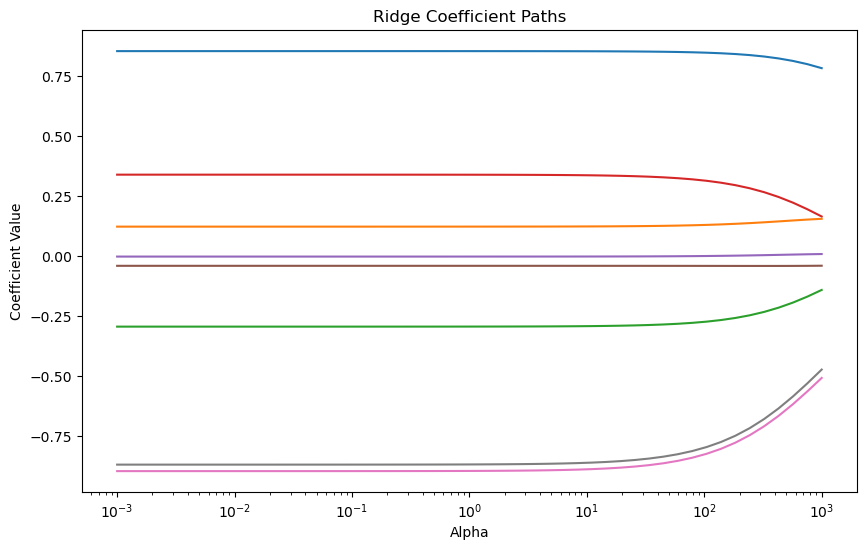

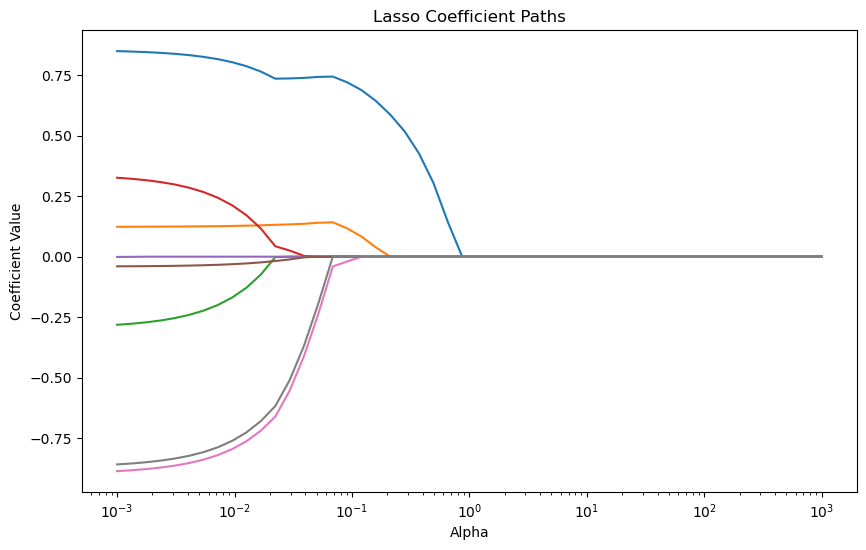

In [6]:
alphas = np.logspace(-3, 3, 50)
ridge_coefs = []
lasso_coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    ridge_coefs.append(ridge.coef_)
    
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    lasso_coefs.append(lasso.coef_)

plt.figure(figsize=(10, 6))
plt.plot(alphas, ridge_coefs)
plt.xscale("log")
plt.title("Ridge Coefficient Paths")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_coefs)
plt.xscale("log")
plt.title("Lasso Coefficient Paths")
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.show()


## 🚀 Mini Project – Regularization Showdown

Goal: Compare Ridge and Lasso performance against Linear Regression to identify which model generalizes best.

- Evaluate overfitting with different alpha values

- Observe how Lasso performs feature selection by zeroing small coefficients

- Summarize findings in your own words

## Set up models and alphas to test

In [7]:

alphas = np.logspace(-4, 2, 25)  # from 1e-4 to 1e2

# containers for metrics and coefficients
results = {
    'alpha': [],
    'ridge_train_rmse': [],
    'ridge_test_rmse': [],
    'lasso_train_rmse': [],
    'lasso_test_rmse': [],
}
ridge_coefs = []
lasso_coefs = []

# baseline linear regression (no alpha)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_train_lr = lr.predict(X_train_scaled)
y_test_lr = lr.predict(X_test_scaled)
lr_train_rmse = np.sqrt(mean_squared_error(y_train, y_train_lr))
lr_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_lr))

print(f"LinearRegression RMSE -> train: {lr_train_rmse:.3f}, test: {lr_test_rmse:.3f}")



LinearRegression RMSE -> train: 0.720, test: 0.746


## Evaluate Ridge and Lasso for each alpha


In [8]:
for a in alphas:
    # Ridge
    ridge = Ridge(alpha=a, random_state=42, max_iter=10000)
    ridge.fit(X_train_scaled, y_train)
    y_tr_r = ridge.predict(X_train_scaled)
    y_te_r = ridge.predict(X_test_scaled)
    ridge_train_rmse = np.sqrt(mean_squared_error(y_train, y_tr_r))
    ridge_test_rmse = np.sqrt(mean_squared_error(y_test, y_te_r))

    # Lasso
    lasso = Lasso(alpha=a, random_state=42, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_tr_l = lasso.predict(X_train_scaled)
    y_te_l = lasso.predict(X_test_scaled)
    lasso_train_rmse = np.sqrt(mean_squared_error(y_train, y_tr_l))
    lasso_test_rmse = np.sqrt(mean_squared_error(y_test, y_te_l))

    # store
    results['alpha'].append(a)
    results['ridge_train_rmse'].append(ridge_train_rmse)
    results['ridge_test_rmse'].append(ridge_test_rmse)
    results['lasso_train_rmse'].append(lasso_train_rmse)
    results['lasso_test_rmse'].append(lasso_test_rmse)

    ridge_coefs.append(ridge.coef_.copy())
    lasso_coefs.append(lasso.coef_.copy())

# convert to DataFrame for convenience
res_df = pd.DataFrame(results)
ridge_coefs = np.array(ridge_coefs)   # shape (len(alphas), n_features)
lasso_coefs = np.array(lasso_coefs)



## Plot Train vs Test RMSE for Ridge and Lasso


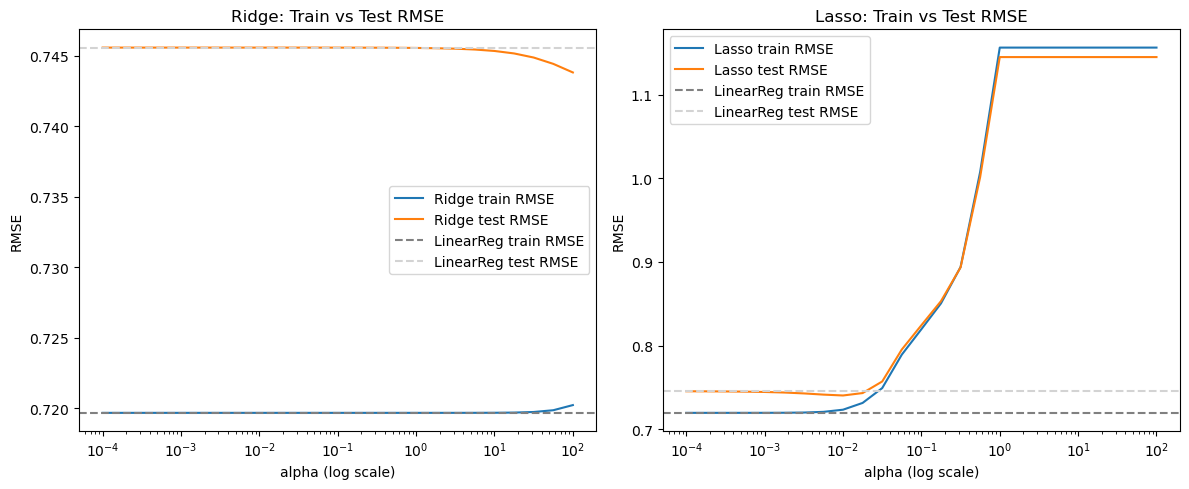

In [9]:
plt.figure(figsize=(12,5))

# Ridge
plt.subplot(1,2,1)
plt.semilogx(res_df['alpha'], res_df['ridge_train_rmse'], label='Ridge train RMSE')
plt.semilogx(res_df['alpha'], res_df['ridge_test_rmse'], label='Ridge test RMSE')
plt.axhline(lr_train_rmse, color='gray', linestyle='--', label='LinearReg train RMSE')
plt.axhline(lr_test_rmse, color='lightgray', linestyle='--', label='LinearReg test RMSE')
plt.xlabel('alpha (log scale)')
plt.ylabel('RMSE')
plt.title('Ridge: Train vs Test RMSE')
plt.legend()

# Lasso
plt.subplot(1,2,2)
plt.semilogx(res_df['alpha'], res_df['lasso_train_rmse'], label='Lasso train RMSE')
plt.semilogx(res_df['alpha'], res_df['lasso_test_rmse'], label='Lasso test RMSE')
plt.axhline(lr_train_rmse, color='gray', linestyle='--', label='LinearReg train RMSE')
plt.axhline(lr_test_rmse, color='lightgray', linestyle='--', label='LinearReg test RMSE')
plt.xlabel('alpha (log scale)')
plt.ylabel('RMSE')
plt.title('Lasso: Train vs Test RMSE')
plt.legend()

plt.tight_layout()
plt.show()


## Coefficient paths (how coefficients change as alpha increases)


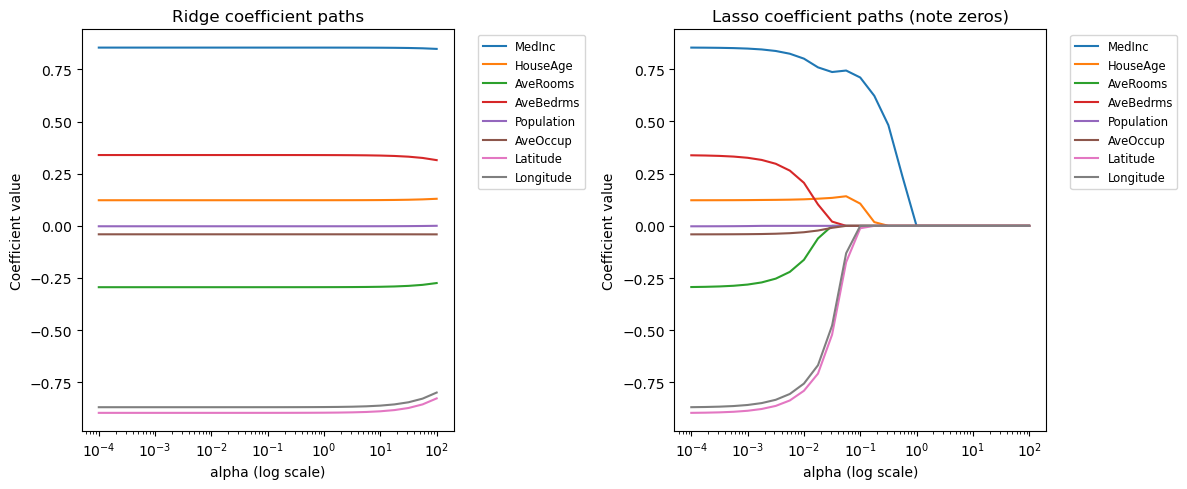

In [12]:
plt.figure(figsize=(12,5))

# Ridge coefficient paths
plt.subplot(1,2,1)
for idx in range(ridge_coefs.shape[1]):
    plt.semilogx(alphas, ridge_coefs[:, idx], label=data.feature_names[idx])
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Ridge coefficient paths')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

# Lasso coefficient paths
plt.subplot(1,2,2)
for idx in range(lasso_coefs.shape[1]):
    plt.semilogx(alphas, lasso_coefs[:, idx], label=data.feature_names[idx])
plt.xlabel('alpha (log scale)')
plt.ylabel('Coefficient value')
plt.title('Lasso coefficient paths (note zeros)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()


## Count non-zero coefficients across alphas for Lasso (feature selection behavior)


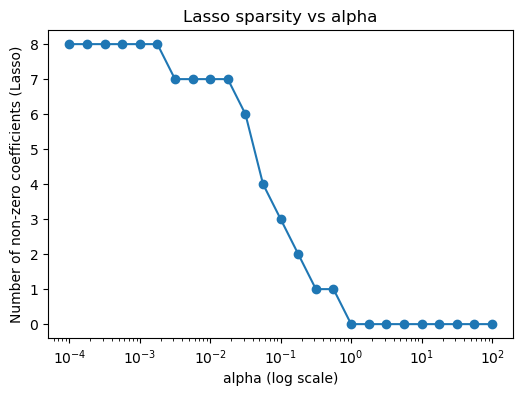

,alpha,lasso_nonzero,lasso_test_rmse
0,0.000100,8,0.745483
1,0.000178,8,0.745407
2,0.000316,8,0.745274
3,0.000562,8,0.745041
4,0.001000,8,0.744642
5,0.001778,8,0.743977
6,0.003162,7,0.742914
7,0.005623,7,0.741487
8,0.010000,7,0.740442
9,0.017783,7,0.743324


In [14]:
nonzero_counts = (np.abs(lasso_coefs) > 1e-8).sum(axis=1)
plt.figure(figsize=(6,4))
plt.semilogx(alphas, nonzero_counts, marker='o')
plt.xlabel('alpha (log scale)')
plt.ylabel('Number of non-zero coefficients (Lasso)')
plt.title('Lasso sparsity vs alpha')
plt.show()

# Print a small table of alpha -> nonzero features
summary_table = pd.DataFrame({
    'alpha': alphas,
    'lasso_nonzero': nonzero_counts,
    'lasso_test_rmse': res_df['lasso_test_rmse']
})
display(summary_table.head(10))


## Pick a "good" alpha by lowest test RMSE and show coefficients


In [16]:
best_ridge_idx = np.argmin(res_df['ridge_test_rmse'])
best_lasso_idx = np.argmin(res_df['lasso_test_rmse'])

print("Best Ridge alpha:", res_df['alpha'][best_ridge_idx],
      "test RMSE:", res_df['ridge_test_rmse'][best_ridge_idx])
print("Best Lasso alpha:", res_df['alpha'][best_lasso_idx],
      "test RMSE:", res_df['lasso_test_rmse'][best_lasso_idx])

# show coefficients for best models
best_ridge = Ridge(alpha=res_df['alpha'][best_ridge_idx]).fit(X_train_scaled, y_train)
best_lasso = Lasso(alpha=res_df['alpha'][best_lasso_idx]).fit(X_train_scaled, y_train)

coef_df = pd.DataFrame({
    'feature': data.feature_names,
    'linreg_coef': lr.coef_,
    'ridge_coef': best_ridge.coef_,
    'lasso_coef': best_lasso.coef_
})
display(coef_df)


Best Ridge alpha: 100.0 test RMSE: 0.7438185949703783
Best Lasso alpha: 0.01 test RMSE: 0.7404423656125414


,feature,linreg_coef,ridge_coef,lasso_coef
0,MedInc,0.854383,0.848139,0.800957
1,HouseAge,0.122546,0.129512,0.127087
2,AveRooms,-0.294410,-0.274522,-0.162759
3,AveBedrms,0.339259,0.314804,0.206207
4,Population,-0.002308,-0.000024,-0.000000
5,AveOccup,-0.040829,-0.041133,-0.030602
6,Latitude,-0.896929,-0.827628,-0.790113
7,Longitude,-0.869842,-0.799554,-0.755674


# ✍️ Reflection (fill in / paste your observations)

**1) Which model generalized best (lowest test RMSE)?**  
- _Write which of LinearRegression / Ridge / Lasso had the lowest test RMSE. Note the alpha values you found for best Ridge & Lasso._

Best Lasso alpha: 0.01 test RMSE: 0.7404423656125414


**2) Did regularization reduce overfitting?**  
- _Compare train vs test RMSE curves. If training RMSE increased and test RMSE decreased as alpha increased, that indicates reduced overfitting._

Yes!

**3) How did Lasso perform feature selection?**  
- _Use the coefficient table above: how many coefficients did Lasso set to (near) zero? Which features were dropped?_

1 feature (Population) was effectively set to zero, meaning Lasso identified it as not contributing much to predicting the target.

The rest were shrunk but not removed, showing moderate influence.

Compared to Ridge, which only shrinks coefficients smoothly, Lasso both shrinks and eliminates less important features — making it useful when you want a simpler, more interpretable model.

**4) Practical takeaway**  
- _When would you pick Ridge vs Lasso vs no regularization in practice? (hint: use Lasso when you want sparsity/feature selection; Ridge when you want shrinkage but keep features)_

- Linear Regression (no regularization):
Use when you have few features, little multicollinearity, and want the model to fully fit all coefficients without penalty. Best for simple, well-behaved datasets.

- Ridge Regression:
Use when you suspect multicollinearity or overfitting, but still want to keep all features. Ridge applies L2 regularization, which shrinks coefficients smoothly toward zero but never eliminates them. Great when every feature contributes a bit.

- Lasso Regression:
Use when you want feature selection — L1 regularization drives some coefficients exactly to zero, simplifying the model and revealing which variables truly matter. Ideal when you have many features, or when interpretability is important.

✅ In short:

- Use Ridge when you want stability.

- Use Lasso when you want simplicity.

- Use plain Linear Regression when you’re confident your data is clean and not overfitting.